# MODEL BUILDING

In [2]:
# BASIC IMPORT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# MODELING
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('modified_data_cluster.csv')
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Ttl_yrs_in_comp,TotalAmountSpend,cluster_num
0,2,2,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,67,11,1617,2
1,2,2,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,70,10,27,1
2,2,2,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,59,10,776,2
3,2,2,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,40,10,53,1
4,4,4,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,43,10,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,2,61223.0,0,1,46,709,43,182,42,...,5,0,0,0,0,0,57,11,1341,2
2236,4,4,64014.0,2,1,56,406,0,30,0,...,7,0,0,0,1,0,78,10,444,1
2237,2,2,56981.0,0,0,91,908,48,217,32,...,6,0,1,0,0,0,43,10,1241,2
2238,3,3,69245.0,0,1,8,428,30,214,80,...,3,0,0,0,0,0,68,10,843,2


In [4]:
scaler=StandardScaler()
Scaled_df= scaler.fit_transform(df)

In [5]:
from sklearn.cluster import KMeans
clusters_model = KMeans(3,random_state=0)
clusters_model.fit(Scaled_df)

c:\ml_projects\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ml_projects\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ml_projects\venv\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ml_projects\venv\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ml_projects\venv\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
  

KMeans(n_clusters=3, random_state=0)

In [7]:
kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(Scaled_df)

In [8]:
predict

array([1, 2, 0, ..., 0, 0, 2], dtype=int32)

c:\ml_projects\venv\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


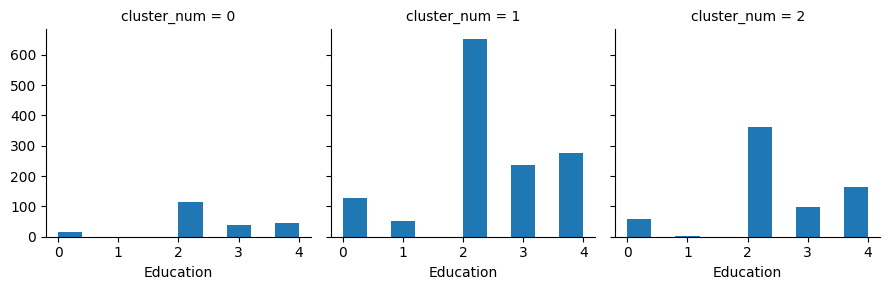

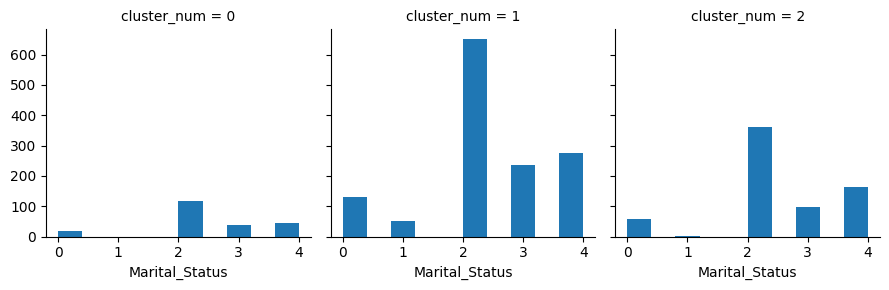

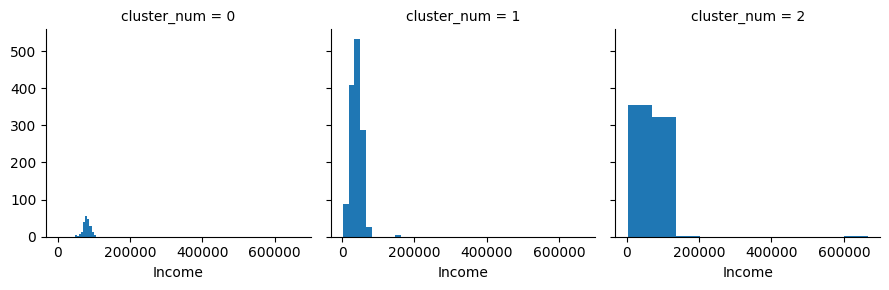

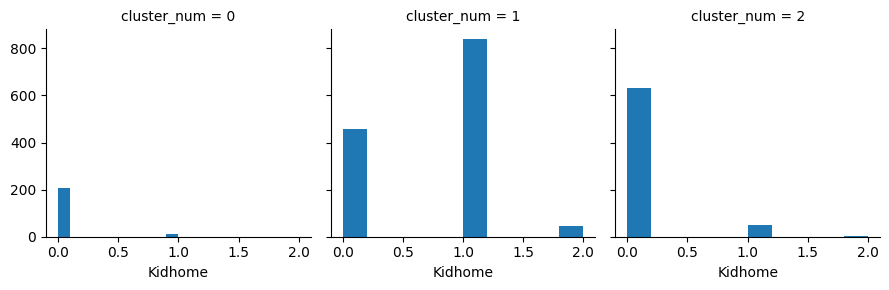

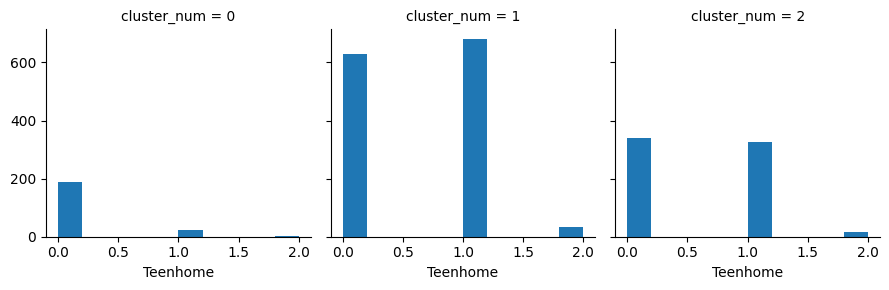

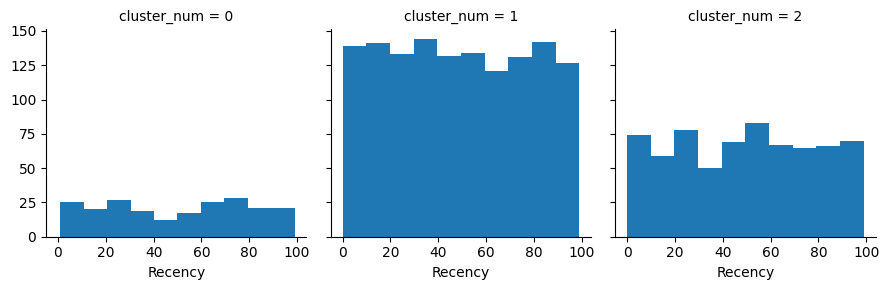

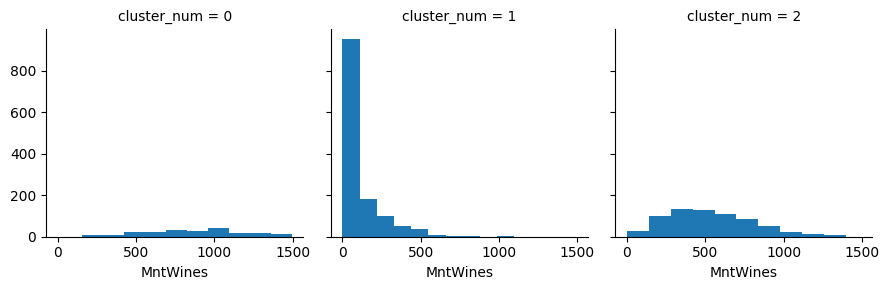

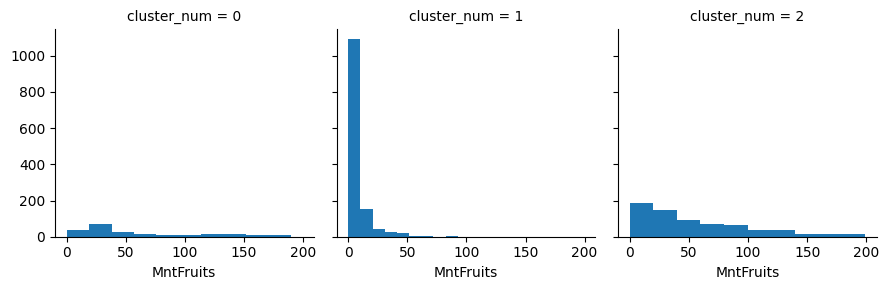

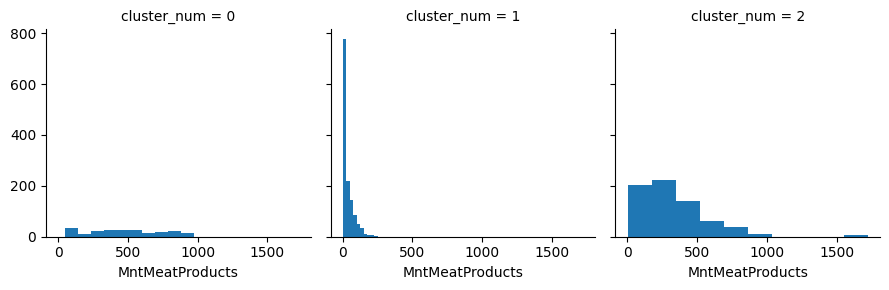

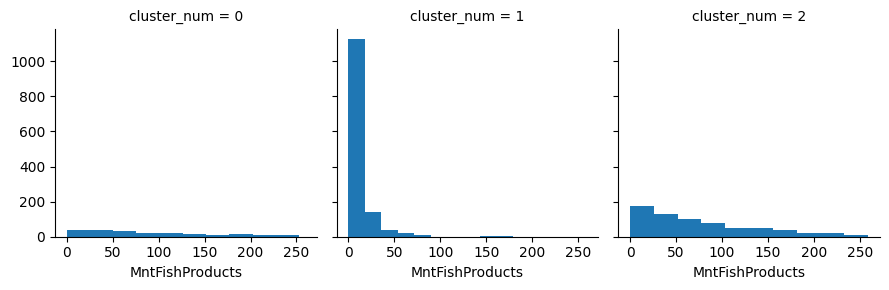

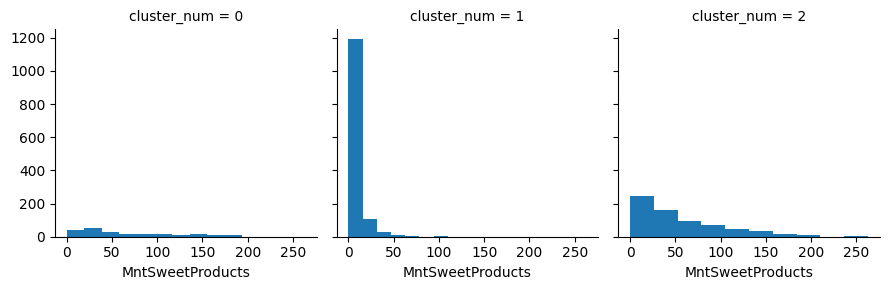

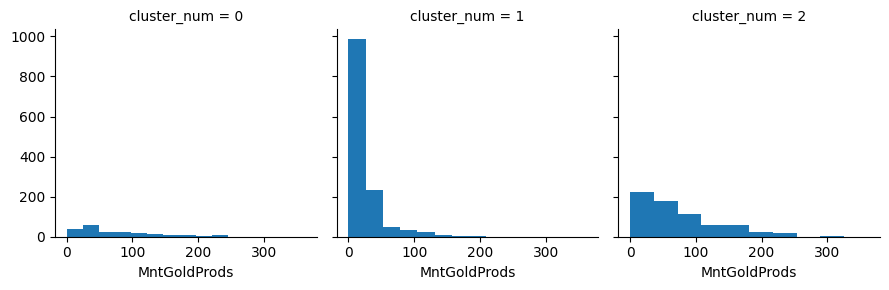

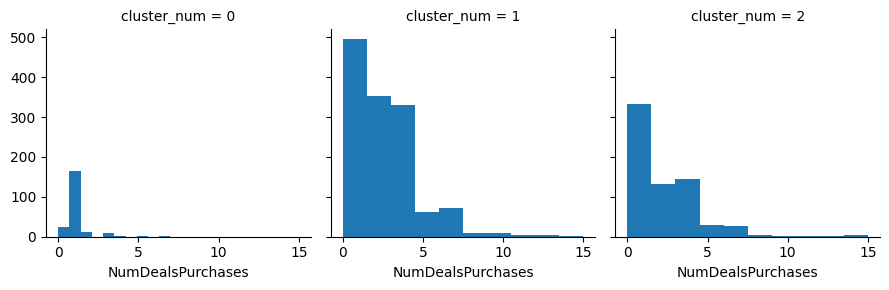

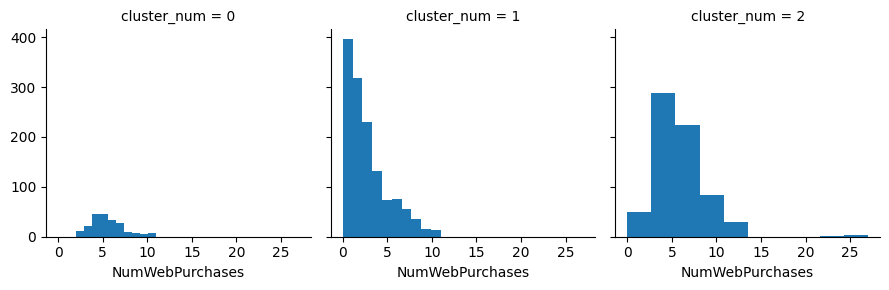

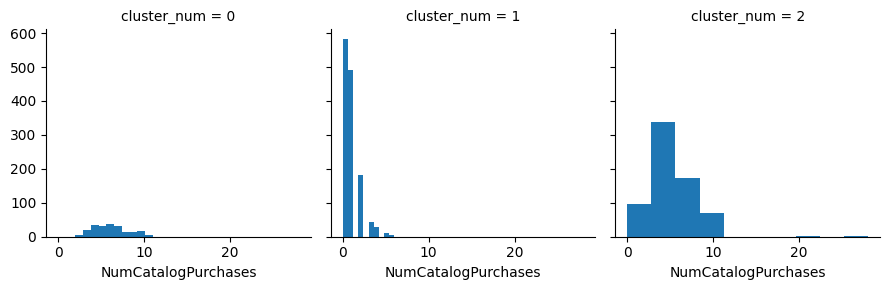

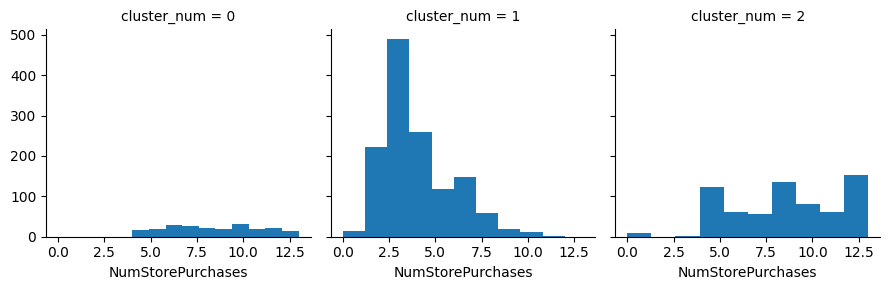

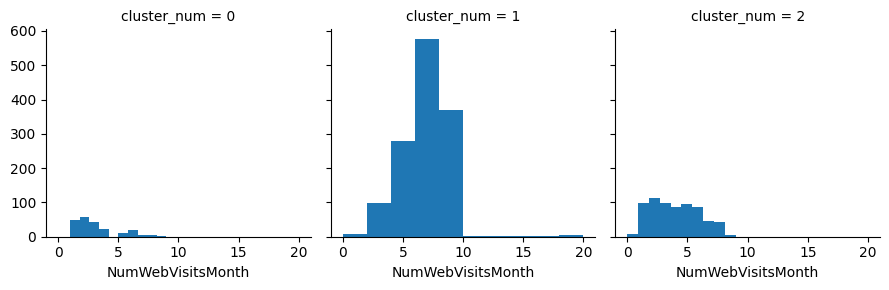

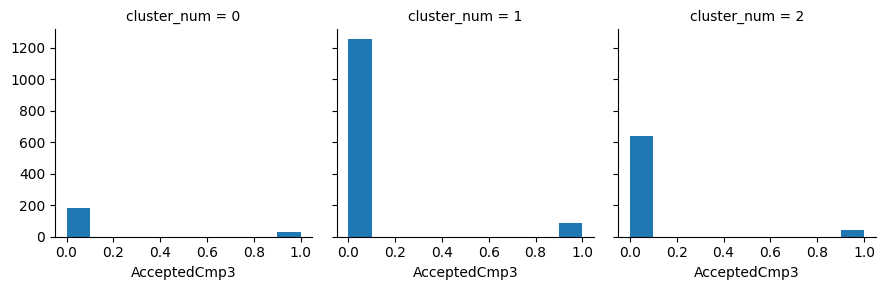

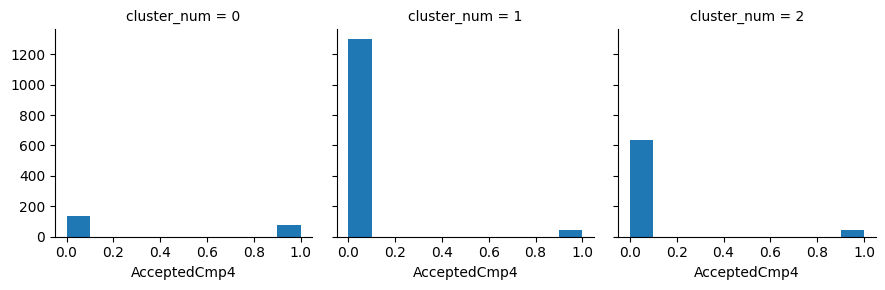

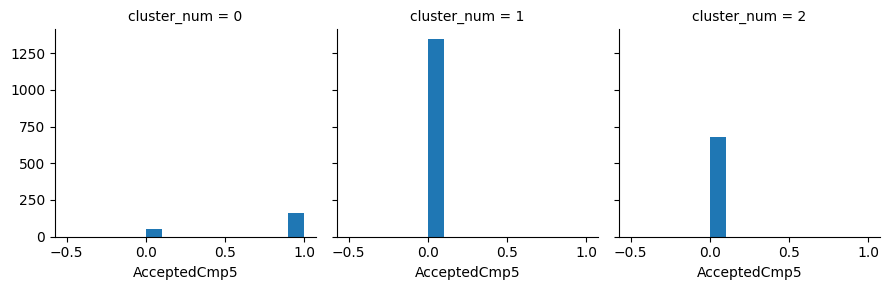

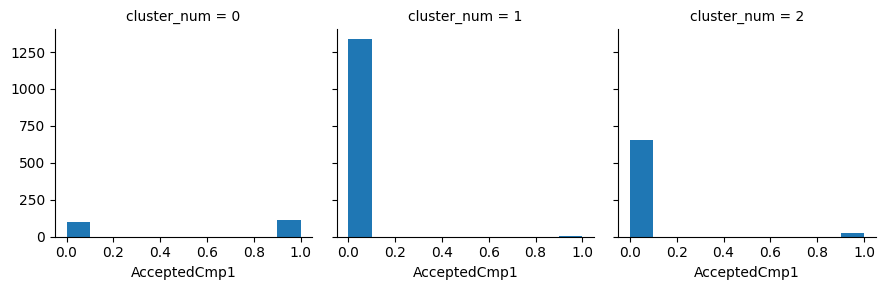

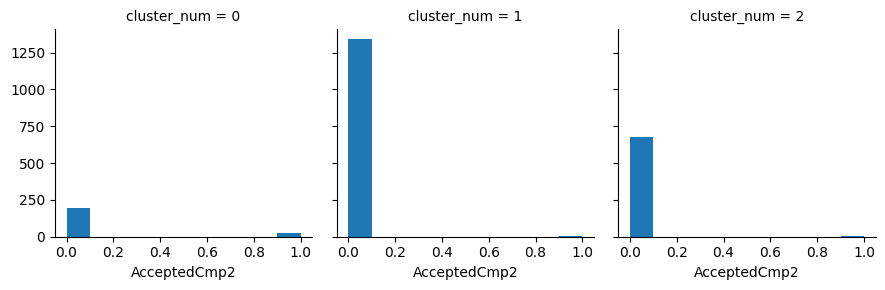

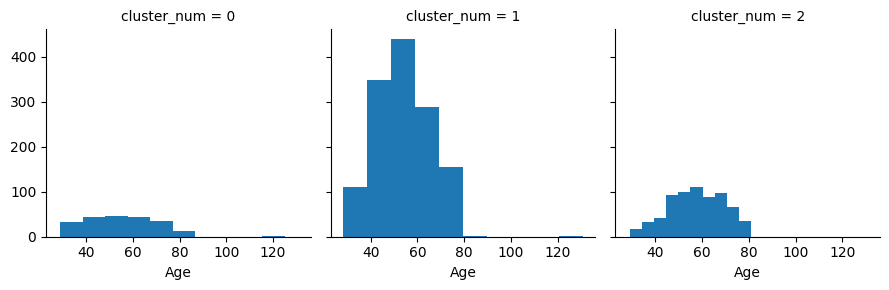

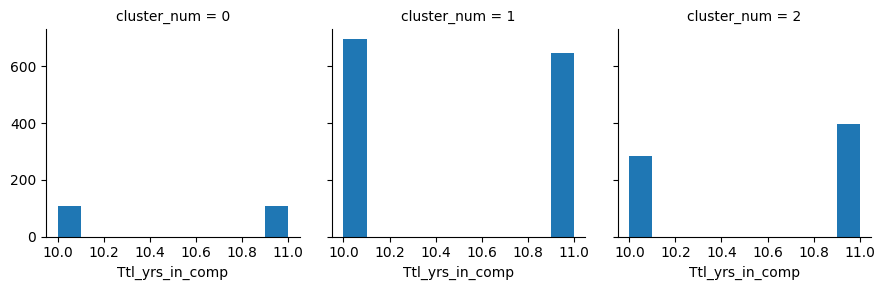

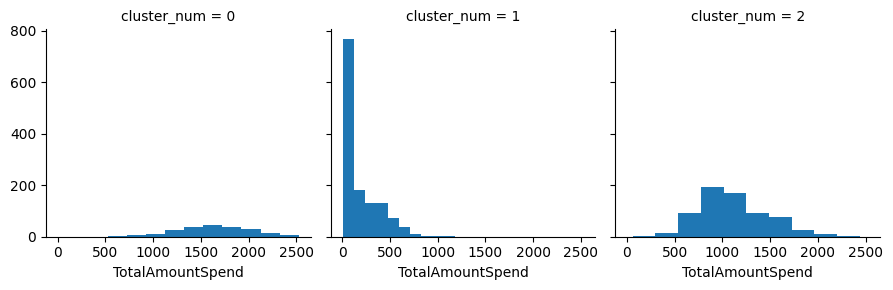

In [15]:
for c in df.drop(['cluster_num'],axis=1):
    grid= sns.FacetGrid(df, col='cluster_num')
    grid= grid.map(plt.hist, c)
plt.show()

In [9]:
import joblib
joblib.dump(kmeans, "kmeans_model.pk1")

['kmeans_model.pk1']

In [10]:
X = df.drop(['cluster_num'],axis=1)
y= df[['cluster_num']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [11]:
X_train

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Ttl_yrs_in_comp,TotalAmountSpend
68,2,2,69096.0,0,1,4,247,49,159,7,...,10,4,0,0,0,0,0,66,10,653
1806,4,4,7144.0,0,2,92,81,4,33,5,...,1,0,0,0,0,0,0,58,10,416
89,2,2,54178.0,0,1,79,135,9,39,4,...,5,2,0,0,0,0,0,57,10,194
576,2,2,51287.0,1,1,10,117,0,22,13,...,3,7,0,0,0,0,0,56,10,182
2152,2,2,17148.0,1,0,80,9,9,11,13,...,3,8,0,0,0,0,0,48,10,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,2,2,62807.0,0,1,83,526,28,135,10,...,12,5,0,0,0,0,0,64,11,819
616,3,3,35791.0,2,1,94,27,0,5,0,...,3,8,0,0,0,0,0,59,11,35
787,4,4,42564.0,0,1,28,324,48,186,39,...,4,7,1,0,0,0,0,56,11,813
1868,3,3,30538.0,1,0,27,284,0,52,8,...,4,10,0,0,0,0,0,53,11,367


In [12]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test and y_pred are already defined
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 71   0   2]
 [  0 448  12]
 [  2  11 194]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        73
           1       0.98      0.97      0.97       460
           2       0.93      0.94      0.93       207

    accuracy                           0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740



# saving the decision tree model as future prediction

In [15]:
import pickle
filename= 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))



loaded_model = pickle.load(open(filename,  'rb'))
result = loaded_model.score(X_test, y_test)
print(result, '% Accuracy')

0.9635135135135136 % Accuracy
